In [1]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

text

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"

In [3]:
library(dplyr)
text_df <- tibble(line = 1:4, text = text)

text_df

line,text
<int>,<chr>
1,Because I could not stop for Death -
2,He kindly stopped for me -
3,The Carriage held but just Ourselves -
4,and Immortality


In [4]:
library(tidytext)

text_df %>%
  unnest_tokens(word, text)

line,word
<int>,<chr>
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly


In [5]:
library(janeaustenr)
library(dplyr)
library(stringr)

original_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
  ungroup()

original_books

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0


In [6]:
library(tidytext)
tidy_books <- original_books %>%
  unnest_tokens(word, text)

tidy_books

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1


In [7]:
data(stop_words)

tidy_books <- tidy_books %>%
  anti_join(stop_words)

Joining, by = "word"



In [8]:
tidy_books %>%
  count(word, sort = TRUE) 

word,n
<chr>,<int>
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727


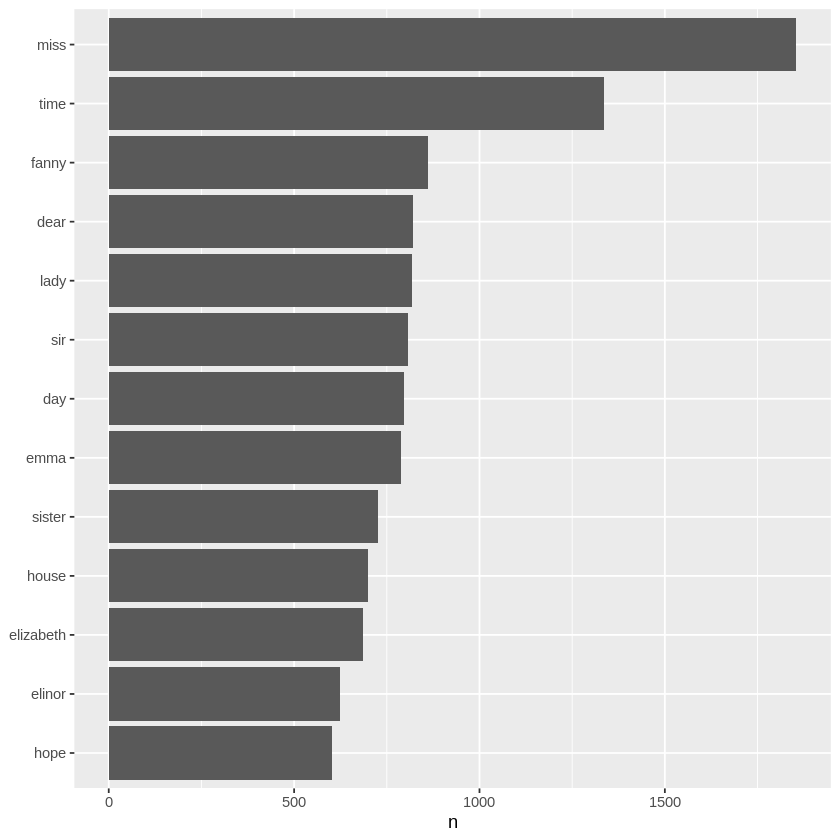

In [10]:
library(ggplot2)

tidy_books %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()